# Anàlisi dades BiciMAD

In [1]:
# Importamos las librerías necesarias

%matplotlib inline
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json

Partimos de dos conjuntos de datos:

- `bicis_nodes.json`: Contiene todas las estacaciones de bici de Madrid (BiciMad). Tiene información del id de la estación, el nombre, el número de anclajes y su geolocalización.

- `bicis_edges.json`: Contiene las rutas de los usuarios entre estaciones de bicicleta. `source` indica la estación de origen; `target`, la estación destino; y `frequency`, el número de viajes entre las dos estaciones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Construcción del grafo</strong>
</div>

Tenemos dos archivos, uno con los nodos y otros con las aristas, así que debemos tratarlos por separado.

En primer lugar, cargaremos los nodos y ajustaremos los atributos para poder crear el grafo sin problemas. Después, haremos lo mismo con las aristas y su peso.

In [2]:
# Leemos los nodos
with open('bicis_nodes.json') as f:
    json_data = json.loads(f.read())
    
nodes = []

# Adaptamos el formato para cargarlos
for elem in json_data['nodes']:
    nodes.append([elem['id'],{'name': elem['name'], 'latitut': float(elem['coords'][0]), 'longitud': float(elem['coords'][1]), 'bases': elem['bases'],}])
    
nodes = tuple(nodes)

# Hagamos lo mismo con las aristas
with open('bicis_edges.json') as f:
    json_data = json.loads(f.read())
    
edges = []

# Para evitar errores cambiamos freqüency por weight
for elem in json_data['edges']:
    edges.append([int(elem['source']), int(elem['target']), {'weight': elem['frequency']}])

Con los nodos y aristas ya obtenidas crearemos el grafo haciendo los ajustes pertinentes.

En primer lugar comprobaremos si al añadir las aristas se ha añadido algún nodo adicional. Si es así, eliminaremos este nodo, ya que sólo tendremos en consideración las relaciones de las estaciones del archivo *bicis_nodes.json*.

In [3]:
G = nx.Graph()

# Añadimos y guardamos en una lista los nodos creados
G.add_nodes_from(nodes)
list_nodes = list(G.nodes)

# Añadimos las aristas y guardamos en una lista los nodos que tenemos en este momento
G.add_edges_from(edges)
list_nodes_from_edges = list(G.nodes)

# Comprobamos si existen diferencias entre las listas de nodos antes y después de añadir las relaciones al grafo
print(list(set(list_nodes_from_edges) - set(list_nodes)))

[22]


Vemos que al añadir las aristas se ha creado un nodo que no teníamos, el 22, así que pasamos a eliminarlo.

In [4]:
G.remove_node(22)

# Comprobamos
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 169, 164, 163, 168, 160, 161, 157, 156, 149, 150, 153, 158, 151, 152, 154, 159, 162, 165, 167, 166, 170, 171, 155, 148, 144, 146, 147, 145, 142, 143, 141, 139, 140, 137, 138, 173, 172, 132, 133, 134, 136, 135, 174, 175))

Cambiamos ahora el identificador de las estaciones. En vez del id que venía indicado en el json, utilizaremos el nombre de la estación.

In [5]:
G = nx.relabel_nodes(G, lambda x: G.nodes[x]['name'])

# Comprobamos
list(G.nodes(data=True))[0:5]

[('Puerta del Sol A',
  {'name': 'Puerta del Sol A',
   'latitut': 40.4168961,
   'longitud': -3.7024255,
   'bases': 24}),
 ('Puerta del Sol B',
  {'name': 'Puerta del Sol B',
   'latitut': 40.4170009,
   'longitud': -3.7024207,
   'bases': 24}),
 ('Miguel Moya',
  {'name': 'Miguel Moya',
   'latitut': 40.4205886,
   'longitud': -3.7058415,
   'bases': 24}),
 ('Plaza Conde Suchil',
  {'name': 'Plaza Conde Suchil',
   'latitut': 40.4302937,
   'longitud': -3.7069171,
   'bases': 18}),
 ('Malasaña',
  {'name': 'Malasaña',
   'latitut': 40.4285524,
   'longitud': -3.7025875,
   'bases': 24})]

Por último, antes de visualizar el grafo, comprobaremos si existen bucles. Si es así, los eliminaremos.

In [6]:
len(list(nx.selfloop_edges(G)))

145

Tenemos un total de 145 bucles.

Pasamos a eliminarlos:

In [7]:
# Podemos ver los primeros 5 para ver que todo es correcto
print(list(nx.selfloop_edges(G))[0:5])

# Los eliminamos
G.remove_edges_from(nx.selfloop_edges(G))

# Comprobamos
len(list(nx.selfloop_edges(G)))

[('Puerta del Sol A', 'Puerta del Sol A'), ('Puerta del Sol B', 'Puerta del Sol B'), ('Miguel Moya', 'Miguel Moya'), ('Plaza Conde Suchil', 'Plaza Conde Suchil'), ('Hortaleza', 'Hortaleza')]


0

Ahora que ya hemos realizado las distintas comprobaciones, visualizamos el grafo:

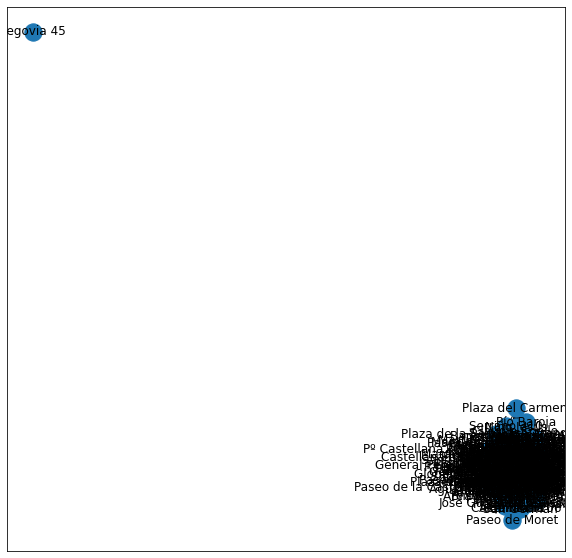

In [8]:
plt.figure(num=None, figsize=(10, 10))
pos = nx.spring_layout(G, seed=123)
nx.draw_networkx(G, pos=pos)

Parece que tenemos un conjunto de estaciones bastante relacionadas entre sí y la estación de Segovia 45 que está aislada de éstas. Al tener esta estación aislada, no podemos ver bien los nodos y las relaciones que forman el mayor conjunto.

En los siguientes puntos veremos con más detalle este hecho y comprobaremos más a fondo las relaciones entre las estaciones y si hay alguna u otras que estén aisladas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis 1:</strong>
</div>

En este punto veremos algunas de las métricas básicas como:

- Número de nodos
- Número de enlaces
- Grado medio (sin peso)
- Grado medio (ponderado por el peso)
- Densidad.

Y nos contestaremos a estas preguntas de análisis:
- ¿El grafo resultante es conexo? En caso de que no lo sea, filtrar y quedar sólo con la componente gigante. ¿Cuántas estaciones la forman?
- ¿Hay estaciones que se encuentran fuera de la componente gigante?

Empezamos analizando las características básicas del grafo con la función *info()*:

In [9]:
print(nx.info(G))

Graph with 172 nodes and 5409 edges


Tenemos un total de **172 nodos** y **5409 aristas**.

El **grado medio es 62.8953**.

Para calcular el grado medio ponderado podemos obtener los grados de cada nodo y después calcular la media. Sólo que en este caso indicaremos *weight* como parámetro de la función degree()*.

In [10]:
# Obtenemos la lista con los grados ponderados
weighted_degree = [d for n, d in G.degree(weight='weight')]

# Calculamos la media
np.mean(weighted_degree)

93.81395348837209

El **grado ponderado medio** del grafo es **93,8139**

Para calcular la densidad utilizaremos la función *density()*. Nos devolverá un valor entre 0 y 1. 0 indicará que no hay ninguna arista y 1 que es un grafo completo, todos los nodos se comunican con el resto de nodos.

In [11]:
nx.density(G)

0.3678090575275398

Viendo esta **densidad** no podemos decir que sea un grafo denso, es decir, habrá bastantes estaciones que no estén comunicadas directamente entre sí.

Al visualizar el grafo ya hemos visto que es un grafo no conexo con al menos dos componentes, la estación de Segovia 45 y el resto. Veamos ahora si hay más componentes de lo que conseguimos ver:

In [12]:
nx.number_connected_components(G)

2

La función *number_connected_components* nos da como resultado que tenemos dos componentes, tal y como habíamos visto en el grafo.

Si las analizamos podemos ver el número de nodos que las forman y cuáles son:

In [13]:
# Estaciones primer componente
print(len(list(nx.connected_components(G))[0]))
print(list(nx.connected_components(G))[0])

print('\n')

# Estaciones segundo componente
print(len(list(nx.connected_components(G))[1]))
print(list(nx.connected_components(G))[1])

171
{'Huertas', 'San Germán', 'Carretas', 'Menéndez Pelayo', 'Conde Duque', 'Plaza de San Ildefonso', 'Santo Domingo', 'Valderribas', 'Doctor Arce 45', 'Augusto Figueroa', 'Velázquez', 'Plaza de la Independencia', 'Príncipe de Vergara', 'Plaza de Felipe II', 'Red de San Luis A', 'Casa Encendida', 'Santa Engracia 127', 'Castellana 164', 'Velázquez 130', 'Ferraz', 'Plaza San Francisco', 'Sor Ángela de la Cruz', 'Segovia 26', 'Columela', "O'Donnell", 'Biblioteca Nacional', 'Palacio de Deportes', 'Ortega y Gasset', 'José Gutiérrez Abascal ', 'Plaza de Colón', 'Conde de Casal', 'Paseo de las Delicias', 'Ribera de Curtidores', 'Pío Baroja', 'Raimundo Fernández', 'Serrano', 'Plaza de San Miguel', 'Plaza de la Provincia', 'Plaza de los Carros', 'Plaza de España A', 'Carlos Cambronero', 'General Álvarez de Castro', 'Plaza de Lavapiés', 'Plaza de Celenque B', 'Juan Bravo 50', 'Plaza de España B', 'San Hermenegildo', 'Méndez Álvaro', 'Plaza de Juan Pujol', 'Puerta del Ángel Caído', 'Castellana 10

Tal y como habíamos presupuesto, un componente lo forma la estación Segovia 45, que ya habíamos visto aislada en la visualización, y el otro componente lo forman el resto de las 171 estaciones.

Para los siguientes análisis utilizaremos sólo la componente gigante que contiene las 171 estaciones, así que nos quedaremos con este primer componente y descartaremos el segundo.

In [14]:
G_gegant = max(nx.connected_components(G), key=len)
G_gegant = G.subgraph(G_gegant)

Visualizamos el grafo del componente gigante:

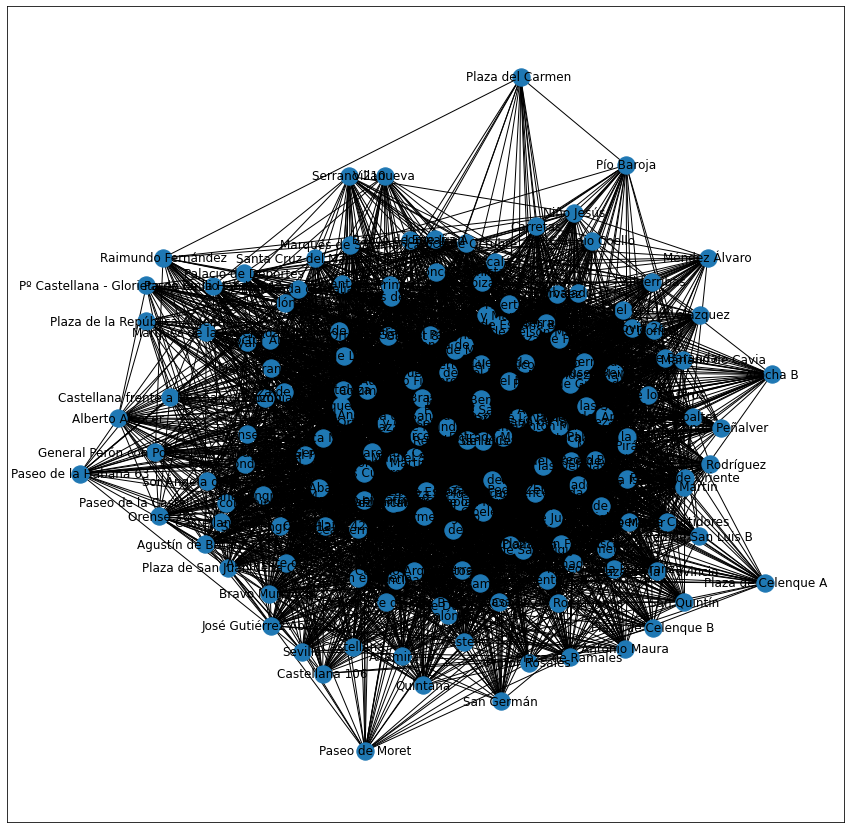

In [15]:
plt.figure(num=None, figsize=(15, 15))
pos = nx.spring_layout(G_gegant, seed=123)
nx.draw_networkx(G_gegant, pos=pos)

Aquí ya podemos ver mejor que con la anterior visualización algunas de las relaciones, aunque hay tantos nodos que sólo con esta visualización no podemos extraer mucha información. Continuaremos con el análisis de esta componente gigante en el siguiente punto.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis 2:</strong>
</div>

A partir de la componente gigante que hemos obtenido, nos planteamos las siguientes preguntas:

- Si tuviéramos que viajar entre las dos estaciones que están más alejadas en número de escaleras, ¿cuáles serían? ¿Qué escalas deberías hacer?
- ¿Cuáles son los principales _hubs_ de BiciMad?
- ¿Cuál es el mayor grupo de estaciones totalmente conectado que contiene la estación "Plaza de Lavapiés"? ¿Cuántas estaciones lo forman?
- ¿Cuál es el grupo más pequeño de estaciones totalmente conectado que contiene la estación "Plaza de Lavapiés"? ¿Cuántas estaciones lo forman?

**Si tuviéramos que viajar entre las dos estaciones que están más alejadas en número de escaleras, ¿cuáles serían? ¿Qué escalas deberías hacer?**

Para saber cuáles son las estaciones que están más lejos podemos ayudarnos de la métrica del diámetro. Con esta métrica podemos calcular el camino más largo entre dos nodos sin repetir ninguna.

In [16]:
nx.diameter(G_gegant)

2

El camino corto más largo entre dos nodos de este grafo será un camino de tamaño dos. Lo que significa que sólo haremos como máximo una escalera para ir de una estación a cualquier otra.

Calculamos ahora el total de caminos de tamaño 2 con la función *shortest_path()*:

In [17]:
# Total caminos cortos del grafo
all_shortest_paths = dict(nx.shortest_path(G_gegant))

Una vez tenemos todos los caminos del grafo en la variable *all_shortest_paths* calcularemos el total de caminos de tamaño 2.

La función *shortest_path()* devuelve, para cada nodo, todos los caminos cortos disponibles hacia el resto de nodos. Por tanto, recorreremos todos los nodos con un bucle *for* y sumaremos el total de caminos de tamaño 2.

Para saber cuántos caminos de tamaño dos tiene el nodo en cuestión utilizaremos la función *filter()*. Escogeremos los caminos de longitud 3, puesto que en los caminos está incluido el nodo origen.

In [18]:
sum_paths = 0

# Recorremos todos los nodos
for key, values in all_shortest_paths.items():
    # Filtramos los caminos de distancia 2
    x = list(filter(lambda x: len(x[1])==3, values.items()))
    
    # Sumamos el total de caminos de tamaño 2 del nodo pertinente
    sum_paths = sum_paths + len(x)
    
# Comprobamos el total de caminos obtenido
print(sum_paths)

18252


Vemos que tenemos un total de 18252 caminos de tamaño 2 en el grafo.

No mostraremos todos los caminos por ser un número demasiado elevado.

Con el mismo bucle que hemos utilizado para calcular el total de caminos obtendremos la primera ruta que cumpla la condición de ser de tamaño 2 y la imprimiremos.

In [19]:
for key, values in all_shortest_paths.items():
    x = list(filter(lambda x: len(x[1])==3, values.items()))
    
    # Si el nodo tiene al menos un camino de distancia 2, lo imprimimos y salimos del bucle
    if(len(x) > 0):
        print(x[0])
    break

('Puerta del Sol B', ['Puerta del Sol A', 'Arcipreste de Hita B', 'Puerta del Sol B'])


Uno de los caminos más largos que podemos coger en número de escaleras es ir desde *'Puerta del Sol A'* a *'Puerta del Sol B'* haciendo escala en *'Arcipreste de Hita B'*.

**¿Cuáles son los principales _hubs_ de BiciMad?**

Para observar los hubs de esta red, podemos analizar el grado de los distintos nodos.

Dependiendo de cómo interpretemos el grafo, podemos calcular o no los grados de los nodos ponderados. En este caso creemos que lo más adecuado es tener en cuenta los grados ponderados, ya que representa el número de viajes que se realizan entre las estaciones conectadas. Cuanto más viajes se realizan significará que este trayecto es mayor. Saber cuáles son estas estaciones podría servir para añadir más bicicletas en aquéllas con alta frecuencia de viajes si fuera necesario.

Aunque tendremos en cuenta los pesos para decidir cuáles son los hubs, veremos la distribución de los grados ponderados y no ponderados. Así comprobaremos si existen diferencias significativas.

**Distribución de grados no ponderados**

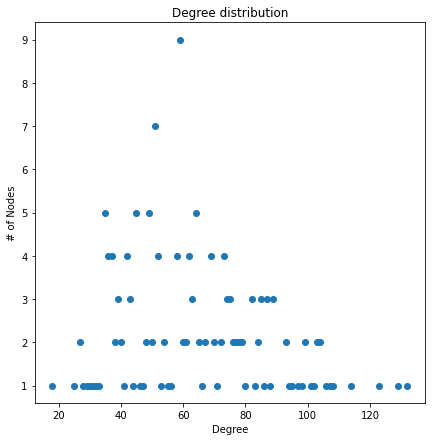

In [20]:
# Obtenemos los grados
degree_sequence = [d for n, d in G_gegant.degree()]

# Los vemos en un scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Degree distribution")
ax.set_xlabel("Degree")
ax.set_ylabel("# of Nodes")

plt.show()

**Distribución de los grados ponderados**

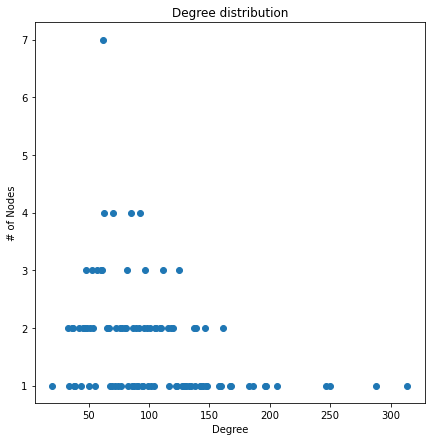

In [21]:
degree_weighted_sequence = [d for n, d in G_gegant.degree(weight='weight')]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(*np.unique(degree_weighted_sequence, return_counts=True))
ax.set_title("Degree distribution")
ax.set_xlabel("Degree")
ax.set_ylabel("# of Nodes")

plt.show()

Ambas distribuciones son bastante parecidas. La mayoría de nodos tienen alrededor de 40 – 90 conexiones y se realizan entre 50 y 150 viajes. En ambas distribuciones podemos ver que hay 4 nodos que destacan sobre el resto, siendo más destacable esta diferencia en la distribución de los grados ponderados.

Como hemos dicho al inicio, consideramos que tendrán mayor importancia los nodos que presentan un mayor grado ponderado, es decir, las estaciones que tengan una mayor frecuencia de viajes. Por tanto veamos los 4 nodos más importantes teniendo en cuenta el peso de las aristas:

In [22]:
grados_ponderados = list(nx.degree(G_gegant, weight='weight'))
sorted(grados_ponderados, key=lambda node: node[1], reverse=True)[0:10]

[('Plaza de la Cebada', 314),
 ('Entrada Matadero', 288),
 ('Plaza de Lavapiés', 250),
 ('Plaza de la Independencia', 247),
 ('Paseo de la Florida', 206),
 ('Santa María de la Cabeza', 197),
 ('Glorieta de los Cuatro Caminos', 196),
 ('General Álvarez de Castro', 186),
 ('Antón Martín', 183),
 ('Red de San Luis A', 168)]

Los hubs de la red de BiciMad son las siguientes estaciones (por orden de importancia):

- Plaza de la Cebada
- Entrada Matadero
- Plaza de Lavapiés
- Plaza de la Independencia

**¿Cuál es el mayor grupo de estaciones totalmente conectado que contiene la estación "Plaza de Lavapiés"? ¿Cuántas estaciones lo forman?**

Como hemos visto en el punto 7.2.1 del libro *Networks* proporcionado a la teoría de la asignatura, los grupos de nodos que están conectados totalmente entre ellos en un grafo se llaman *cliques*. Por tanto, para obtener el grupo más grande de estaciones totalmente conectadas entre sí que contiene la estación *Plaza de Lavapiés* utilizaremos las funciones relativas a *cliques* que nos proporciona *NetworkX*.

En primer lugar vemos el total de *cliques* que contienen la estación:

In [23]:
nx.number_of_cliques(G_gegant, nodes='Plaza de Lavapiés')

26935

Con la función *number_of_cliques()* vemos que la estación *Plaza de Lavapiés* está presente en 26935 cliques.

Ahora bien, ¿cuál es el que presenta un mayor tamaño entre todos estos conjuntos?

Utilizaremos la función *node_clique_number()*, que devuelve el tamaño del *clique* mayor del nodo o nodos indicados:

In [24]:
nx.node_clique_number(G_gegant, nodes='Plaza de Lavapiés')

15

El grupo de estaciones totalmente conectadas más grande que contiene la estación *Plaza de lavapiés* estará formado por 15 estaciones.

Usamos ahora el mismo procedimiento que hemos hecho a lo largo del documento, filtramos el resultado de *cliques_containing_node()* para quedarnos con aquellos de tamaño 15 y vemos los tres primeros:

In [25]:
list(filter(lambda x: len(x)==15, nx.cliques_containing_node(G_gegant, nodes='Plaza de Lavapiés')))[0:3]

[['Plaza de la Cebada',
  'Plaza de la Independencia',
  'Plaza de Lavapiés',
  'General Álvarez de Castro',
  'Santa María de la Cabeza',
  'Antón Martín',
  'Jacinto Benavente',
  'Huertas',
  'Puerta de Toledo',
  'Paseo de las Delicias',
  'Palos de la Frontera',
  'Red de San Luis A',
  'Barceló',
  'Plaza de España A',
  'Plaza de San Ildefonso'],
 ['Plaza de la Cebada',
  'Plaza de la Independencia',
  'Plaza de Lavapiés',
  'General Álvarez de Castro',
  'Santa María de la Cabeza',
  'Antón Martín',
  'Jacinto Benavente',
  'Puerta de Toledo',
  'Barceló',
  'Paseo de las Delicias',
  'San Bernardo',
  'Santo Domingo',
  'Puerta de Granada',
  'Plaza de San Ildefonso',
  'Metro Pirámides'],
 ['Plaza de la Cebada',
  'Plaza de la Independencia',
  'Plaza de Lavapiés',
  'General Álvarez de Castro',
  'Santa María de la Cabeza',
  'Antón Martín',
  'Jacinto Benavente',
  'Paseo de la Florida',
  'Barceló',
  'Paseo de las Delicias',
  'Santo Domingo',
  'San Bernardo',
  'Puerta 

Aquí podemos comprobar algunos de los conjuntos.

Para verlo visualmente crearemos un subconjunto con los nodos y las aristas del primer *clique* de estos tres:

In [26]:
# Creamos la lista con las estaciones que queremos quedarnos
list_sub_graf = ['Plaza de la Cebada',
  'Plaza de la Independencia',
  'Plaza de Lavapiés',
  'General Álvarez de Castro',
  'Santa María de la Cabeza',
  'Antón Martín',
  'Jacinto Benavente',
  'Barceló',
  'Paseo de la Florida',
  'Paseo de las Delicias',
  'Santo Domingo',
  'Augusto Figueroa',
  'Puerta de Granada',
  'San Bernardo',
  'Metro Pirámides']

subgraph = G_gegant.subgraph(list_sub_graf)
print(nx.info(subgraph))

Graph with 15 nodes and 105 edges


Con *info()* comprobamos que tenemos un grafo con 15 nodos.

Visualizamos este grafo:

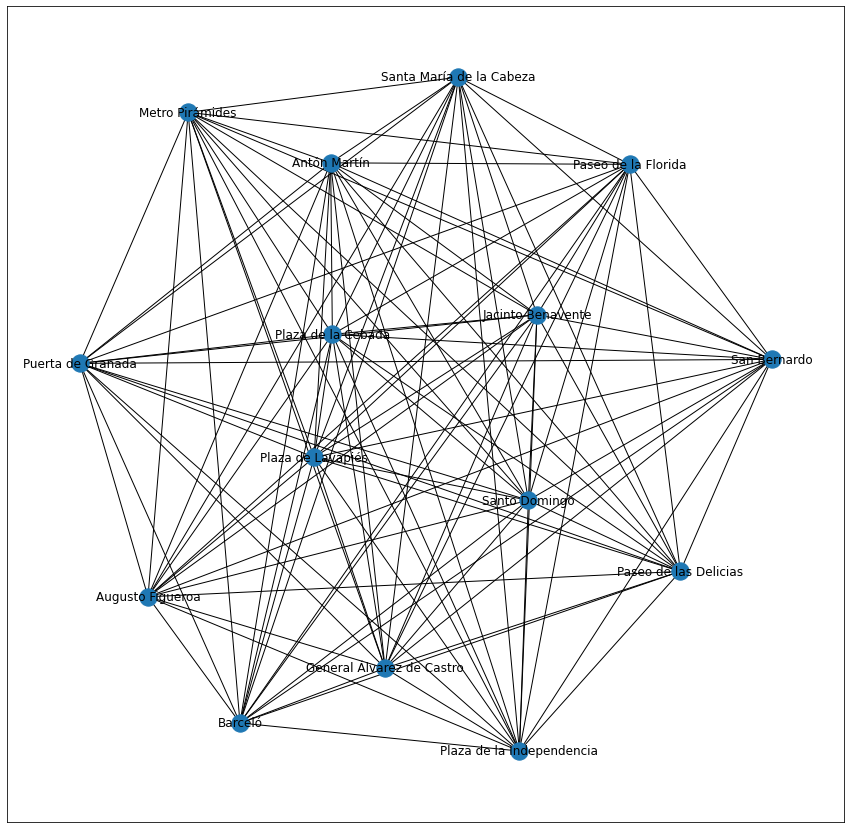

In [27]:
plt.figure(num=None, figsize=(15, 15))
pos = nx.spring_layout(subgraph, seed=123)
nx.draw_networkx(subgraph, pos=pos)

Podemos ver que tenemos 15 estaciones que parecen totalmente conectadas entre sí. Aunque es difícil ver si esto se cumple sólo con la visualización.

Para asegurarnos, comprobamos los grados de cada uno de estos nodos:

In [28]:
list(subgraph.degree())

[('Plaza de la Independencia', 14),
 ('Metro Pirámides', 14),
 ('Antón Martín', 14),
 ('San Bernardo', 14),
 ('Puerta de Granada', 14),
 ('Plaza de la Cebada', 14),
 ('Barceló', 14),
 ('Paseo de la Florida', 14),
 ('General Álvarez de Castro', 14),
 ('Santa María de la Cabeza', 14),
 ('Paseo de las Delicias', 14),
 ('Jacinto Benavente', 14),
 ('Santo Domingo', 14),
 ('Plaza de Lavapiés', 14),
 ('Augusto Figueroa', 14)]

Efectivamente, todas las estaciones tienen un grado de 14, es decir, todas están conectadas entre sí.

**¿Cuál es el grupo más pequeño de estaciones totalmente conectado que contiene la estación "Plaza de Lavapiés"? ¿Cuántas estaciones lo forman?**

Para obtener el grupo más pequeño, seguiremos casi los mismos pasos que en el apartado anterior.

Obtendremos todos los *cliques* de la estación *Plaza Lavapiés* y después mostraremos los 3 primeros, pero esta vez ordenados de menor a mayor tamaño.

In [29]:
cliques = nx.cliques_containing_node(G_gegant, nodes='Plaza de Lavapiés')
sorted(cliques,  key=len)[0:3]

[['Mártires Concepcionistas',
  'Plaza de Lavapiés',
  'Alberto Alcocer',
  'Plaza de la República Argentina'],
 ['Plaza de la República Argentina',
  'Plaza de Lavapiés',
  'Conde de Casal',
  'Doctor Arce 45'],
 ['Plaza de la República Argentina',
  'Plaza de Lavapiés',
  'Columela',
  'Plaza Conde Suchil']]

Ahora crearemos un subgrafo y lo mostraremos igual que el anterior:

Graph with 4 nodes and 6 edges


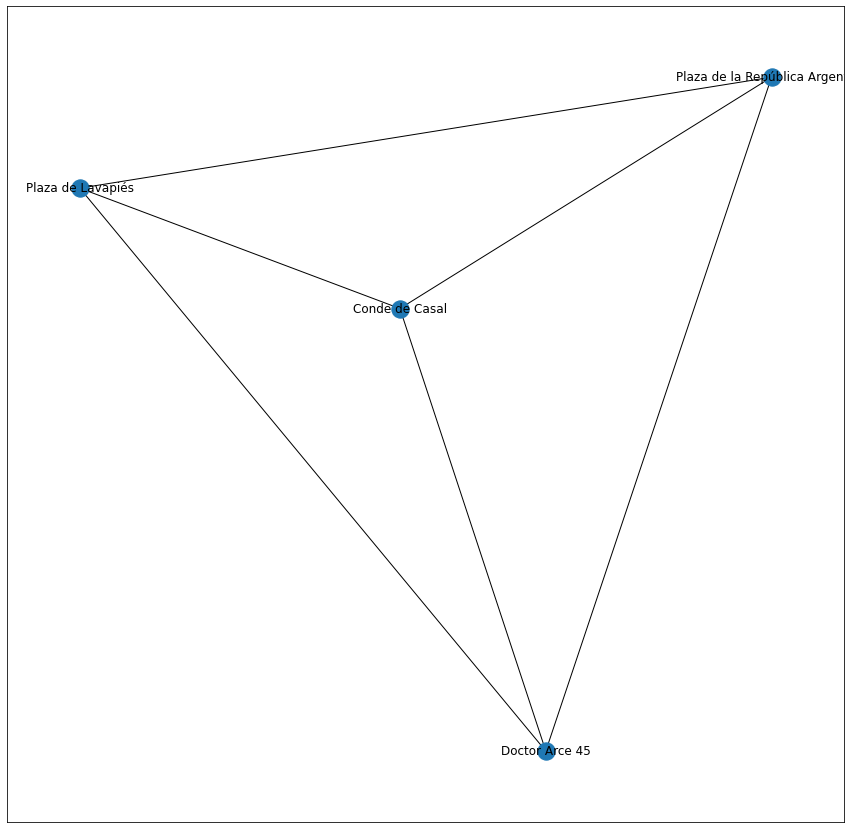

In [30]:
list_sub_graf = ['Conde de Casal',
  'Plaza de la República Argentina',
  'Doctor Arce 45',
  'Plaza de Lavapiés']

subgraph = G_gegant.subgraph(list_sub_graf)

# Comprobamos
print(nx.info(subgraph))

# Visualizamos el grafo
plt.figure(num=None, figsize=(15, 15))
pos = nx.spring_layout(subgraph, seed=123)
nx.draw_networkx(subgraph, pos=pos)

Comprobamos los grados:

In [31]:
list(subgraph.degree())

[('Doctor Arce 45', 3),
 ('Plaza de Lavapiés', 3),
 ('Conde de Casal', 3),
 ('Plaza de la República Argentina', 3)]

En este caso hemos realizado también la comprobación de los grados de los nodos del grafo, aunque en este caso, como hay muchos menos nodos, sí podemos ver fácilmente que todas las estaciones están conectadas entre sí.

## Conclusiones

Por este conjunto de datos teníamos los nodos y las aristas en archivos separados, lo que hace que debamos tratarlos antes para preparar la carga del grafo. Luego lo hemos visualizado y hemos realizado ciertos análisis en su componente gigante. Entre los distintos análisis que hemos realizado podemos destacar el análisis del camino más largo entre dos estaciones, donde hemos visto que para ir de una estación a otra deberemos hacer un máximo de una escalera.